<a href="https://colab.research.google.com/github/jieun0441/XMC/blob/main/Figure_6_CO2_emission_per_typology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
import os

# 1. 구글 드라이브 마운트 (실행 시 나오는 팝업에서 승인 필요)
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#@title Figure 6 preparation
# 총 유입 통행거리(Total Inbound Distance)를 계산하고, 이를 탄소 배출량으로 환산하여 Bar Chart로
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ==========================================
# 1. 설정 및 데이터 로드
# ==========================================
base_path = '/content/drive/MyDrive/FMC_Data/M_B_dong_data_by_purpose_domestic_residents/'
file_cluster = 'Four_category_Seoul_dongs_quadrants_Q1Q4.xlsx'
file_nonwork = 'df_nonwork_intraSeoul.csv'

# [설정] 탄소 배출 계수 (Emission Factor)
EMISSION_FACTOR_TON_PER_KM = 0.00013

# 논문용 색상 및 라벨 정의 (Figure 4, 5와 동일)
cluster_info = {
    'Q1': {'label': 'Residential Nodes (Q1)',       'color': '#FFEB3B'}, # Yellow
    'Q2': {'label': 'Leisure & Cultural Hotspots (Q2)', 'color': '#FF69B4'}, # Hot Pink
    'Q3': {'label': 'Working Hubs (Q3)',            'color': '#FF0000'}, # Red
    'Q4': {'label': 'Mixed-use Zones (Q4)',         'color': '#FF9800'}  # Orange
}
order_list = ['Q1', 'Q2', 'Q3', 'Q4'] # 그래프 출력 순서

print(">> 1. Cluster 정보를 로드합니다...")
df_cluster = pd.read_excel(os.path.join(base_path, file_cluster), usecols=['dong_cd', 'quadrant'])
df_cluster['dong_cd'] = df_cluster['dong_cd'].astype(str)
dong_to_cluster = df_cluster.set_index('dong_cd')['quadrant'].to_dict()

# 각 클러스터별 행정동 개수 (N) 계산
cluster_counts = df_cluster['quadrant'].value_counts()


# ==========================================
# 2. 탄소 배출량 집계 (Total Carbon per Cluster)
# ==========================================
def calculate_carbon_burden(file_name):
    print(f"\n>> Calculating Carbon Emissions from {file_name}...")
    path = os.path.join(base_path, file_name)

    # 클러스터별 총 이동거리 합계 저장소
    cluster_dist_sum = {k: 0.0 for k in order_list}

    chunk_size = 500000
    for i, chunk in enumerate(pd.read_csv(path, usecols=['D_ADMDONG_CD', 'MOVE_DIST', 'CNT'], chunksize=chunk_size)):
        if i % 10 == 0: print(f"   ... processing chunk {i+1}")

        # 도착지 기준 클러스터 매핑
        chunk['D_ADMDONG_CD'] = chunk['D_ADMDONG_CD'].astype(str)
        chunk['dest_cluster'] = chunk['D_ADMDONG_CD'].map(dong_to_cluster)

        # 총 이동거리 = (1회 이동거리) * (통행량)
        chunk['total_dist_m'] = chunk['MOVE_DIST'] * chunk['CNT']

        # 클러스터별 합계 집계
        grouped = chunk.groupby('dest_cluster')['total_dist_m'].sum()
        for q in order_list:
            if q in grouped:
                cluster_dist_sum[q] += grouped[q]

    return cluster_dist_sum

total_dist_by_cluster = calculate_carbon_burden(file_nonwork)


# ==========================================
# 3. 데이터프레임 생성 (평균 배출량 계산)
# ==========================================
data_for_plot = []

print("\n>> Aggregating Results...")
for q in order_list:
    total_dist_km = total_dist_by_cluster[q] / 1000.0       # m -> km
    total_emission = total_dist_km * EMISSION_FACTOR_TON_PER_KM # Total tCO2

    n_dongs = cluster_counts.get(q, 1) # 0으로 나누기 방지
    avg_emission = total_emission / n_dongs # Average per Dong

    data_for_plot.append({
        'Cluster_Code': q,
        'Label': cluster_info[q]['label'],
        'Color': cluster_info[q]['color'],
        'Burden_per_Dong': avg_emission
    })

df_res = pd.DataFrame(data_for_plot)
print(df_res)

>> 1. Cluster 정보를 로드합니다...

>> Calculating Carbon Emissions from df_nonwork_intraSeoul.csv...
   ... processing chunk 1
   ... processing chunk 11
   ... processing chunk 21
   ... processing chunk 31
   ... processing chunk 41
   ... processing chunk 51
   ... processing chunk 61
   ... processing chunk 71
   ... processing chunk 81
   ... processing chunk 91
   ... processing chunk 101
   ... processing chunk 111
   ... processing chunk 121
   ... processing chunk 131
   ... processing chunk 141
   ... processing chunk 151
   ... processing chunk 161
   ... processing chunk 171
   ... processing chunk 181
   ... processing chunk 191
   ... processing chunk 201
   ... processing chunk 211
   ... processing chunk 221
   ... processing chunk 231
   ... processing chunk 241
   ... processing chunk 251
   ... processing chunk 261
   ... processing chunk 271
   ... processing chunk 281
   ... processing chunk 291
   ... processing chunk 301
   ... processing chunk 311
   ... processing chu

>> Downloading and setting Arial font...


/tmp/ipython-input-470/2391732501.py:72: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpatches.Patch(color=row['Color'], alpha=0.9, edgecolor='black', linewidth=0.5)



>> Saving Figure 6 (High Resolution & Clean Subscript)...
   - Figure6_Carbon_Burden.jpg saved
   - Figure6_Carbon_Burden.pdf saved


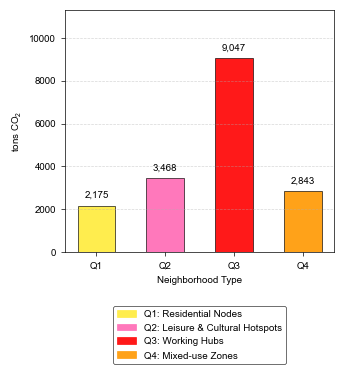

In [4]:
#@title Figure 6
import urllib.request
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ==========================================
# 0. Colab 환경에 Arial 폰트 다운로드 및 강제 적용
# ==========================================
print(">> Downloading and setting Arial font...")
font_url = "https://github.com/matomo-org/travis-scripts/raw/master/fonts/Arial.ttf"
font_path = "Arial.ttf"
urllib.request.urlretrieve(font_url, font_path)

# 폰트 매니저에 추가
fm.fontManager.addfont(font_path)

# 전역 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# [추가] 수식($_2$) 폰트도 일반 폰트(Arial)를 따라가도록 설정
plt.rcParams['mathtext.default'] = 'regular'


# ==========================================
# 4. Figure 6 그리기 (저널 1단 포맷 - Arial 및 아래첨자 해결)
# ==========================================
def draw_figure6_fixed(df):
    # 88mm를 inch로 변환 (1 inch = 25.4 mm)
    mm_to_inch = 1 / 25.4
    fig_width = 88 * mm_to_inch
    fig_height = 80 * mm_to_inch

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # 막대 그래프 테두리를 아주 얇게 설정 (linewidth=0.5)
    bars = ax.bar(df['Cluster_Code'], df['Burden_per_Dong'],
                  color=df['Color'], edgecolor='black', alpha=0.9, width=0.55, linewidth=0.5)

    # 최대 높이 계산 (Y축 설정용)
    max_height = df['Burden_per_Dong'].max()

    # 값 표시 (Values on top)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + (max_height * 0.03),
                f'{height:,.0f}',
                ha='center', va='bottom', fontsize=7, color='black')

    # 축 여백 설정
    ax.set_ylim(0, max_height * 1.25)

    # [수정] 세로축 라벨을 LaTeX 수식 포맷($_2$)으로 변경하여 아래첨자 완벽 구현
    ax.set_ylabel('tons CO$_2$', fontsize=7)
    ax.set_xlabel('Neighborhood Type', fontsize=7)

    # 축 눈금(Ticks) 폰트 크기 및 선 두께 얇게 설정 (width=0.5)
    ax.tick_params(axis='both', which='major', labelsize=7, width=0.5, length=3)

    # 배경 그리드 (수평선) 두께 얇게 설정 (linewidth=0.5)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5, linewidth=0.5)

    # 그래프 바깥쪽 테두리(Spines) 두께도 얇게 통일
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    # 하단 범례(Legend) 생성
    legend_patches = []
    for _, row in df.iterrows():
        # 범례 아이콘 테두리 얇게 (linewidth=0.5)
        patch = mpatches.Patch(color=row['Color'], alpha=0.9, edgecolor='black', linewidth=0.5)

        original_label = row['Label']
        text_part = original_label.split(' (')[0]
        new_label = f"{row['Cluster_Code']}: {text_part}"

        patch.set_label(new_label)
        legend_patches.append(patch)

    legend = ax.legend(handles=legend_patches,
              loc='upper center',
              bbox_to_anchor=(0.5, -0.2),
              ncol=1,
              fontsize=7,
              frameon=True)

    # 범례 테두리 굵기 얇게 (linewidth=0.5)
    legend.get_frame().set_linewidth(0.5)
    legend.get_frame().set_edgecolor('black')

    # 저장
    print("\n>> Saving Figure 6 (High Resolution & Clean Subscript)...")
    plt.savefig('Figure6_Carbon_Burden.jpg', dpi=300, bbox_inches='tight')
    plt.savefig('Figure6_Carbon_Burden.pdf', bbox_inches='tight')
    print("   - Figure6_Carbon_Burden.jpg saved")
    print("   - Figure6_Carbon_Burden.pdf saved")

    plt.show()

# 메모리에 살아있는 df_res를 인자로 넣어 그래프만 다시 그리기!
draw_figure6_fixed(df_res)